In [1]:
#use base 3.12.7
import pandas as pd
import censusdata
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [2]:
censusdata.search('acs5', 2019, 'label', 'travel time')

[('B08013_001E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY SEX',
  'Estimate!!Aggregate travel time to work (in minutes):'),
 ('B08013_002E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY SEX',
  'Estimate!!Aggregate travel time to work (in minutes):!!Male'),
 ('B08013_003E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY SEX',
  'Estimate!!Aggregate travel time to work (in minutes):!!Female'),
 ('B08131_001E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY PLACE OF WORK--STATE AND COUNTY LEVEL',
  'Estimate!!Aggregate travel time to work (in minutes):'),
 ('B08131_002E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY PLACE OF WORK--STATE AND COUNTY LEVEL',
  'Estimate!!Aggregate travel time to work (in minutes):!!Worked in State of residence:'),
 ('B08131_003E',
  'AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY PLACE OF WORK--STATE AND COUNTY LEVEL',
  'Estimate!!Aggregate travel time to work (in minutes)

In [3]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25077'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25077_001E  | MEDIAN VALUE (DOLLARS)         | !! Estimate Median value (dollars)                       | int  
-------------------------------------------------------------------------------------------------------------------


In [4]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B19013'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19013_001E  | MEDIAN HOUSEHOLD INCOME IN THE | !! Estimate Median household income in the past 12 month | int  
-------------------------------------------------------------------------------------------------------------------


In [5]:
censusdata.geographies(censusdata.censusgeo([('state', '19'), ('county', '*')]), 'acs5', 2019)

{'Benton County, Iowa': censusgeo((('state', '19'), ('county', '011'))),
 'Dubuque County, Iowa': censusgeo((('state', '19'), ('county', '061'))),
 'Pocahontas County, Iowa': censusgeo((('state', '19'), ('county', '151'))),
 'Van Buren County, Iowa': censusgeo((('state', '19'), ('county', '177'))),
 'Adams County, Iowa': censusgeo((('state', '19'), ('county', '003'))),
 'Audubon County, Iowa': censusgeo((('state', '19'), ('county', '009'))),
 'Davis County, Iowa': censusgeo((('state', '19'), ('county', '051'))),
 'Ida County, Iowa': censusgeo((('state', '19'), ('county', '093'))),
 'Monroe County, Iowa': censusgeo((('state', '19'), ('county', '135'))),
 'Sioux County, Iowa': censusgeo((('state', '19'), ('county', '167'))),
 'Calhoun County, Iowa': censusgeo((('state', '19'), ('county', '025'))),
 'Cerro Gordo County, Iowa': censusgeo((('state', '19'), ('county', '033'))),
 'Hardin County, Iowa': censusgeo((('state', '19'), ('county', '083'))),
 'Lucas County, Iowa': censusgeo((('state'

In [6]:
cookbg1 = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '19'), ('county', '*'), ('block group', '*')]),['B19013_001E'])
cookbg1['Median Income']= cookbg1.B19013_001E + 0
cookbg1.sort_values('Median Income', ascending=True, inplace=True)
cookbg1


,B19013_001E,Median Income
"Block Group 1, Census Tract 103.01, Johnson County, Iowa: Summary level: 150, state:19> county:103> tract:010301> block group:1",-666666666,-666666666
"Block Group 5, Census Tract 26.04, Black Hawk County, Iowa: Summary level: 150, state:19> county:013> tract:002604> block group:5",-666666666,-666666666
"Block Group 1, Census Tract 6803, Winnebago County, Iowa: Summary level: 150, state:19> county:189> tract:680300> block group:1",-666666666,-666666666
"Block Group 6, Census Tract 18, Woodbury County, Iowa: Summary level: 150, state:19> county:193> tract:001800> block group:6",-666666666,-666666666
"Block Group 3, Census Tract 11, Woodbury County, Iowa: Summary level: 150, state:19> county:193> tract:001100> block group:3",-666666666,-666666666
...,...,...
"Block Group 5, Census Tract 101.02, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:010102> block group:5",160144,160144
"Block Group 1, Census Tract 110.28, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:011028> block group:1",164667,164667
"Block Group 2, Census Tract 110.26, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:011026> block group:2",169558,169558
"Block Group 1, Census Tract 102.02, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:010202> block group:1",188349,188349


In [7]:
cookbg = censusdata.download('acs5', 2019, censusdata.censusgeo([('state', '19'), ('county', '*'), ('block group', '*')]),['B25077_001E'])
cookbg["Median House Value"]= cookbg.B25077_001E + 0
cookbg


,B25077_001E,Median House Value
"Block Group 2, Census Tract 5601, Mitchell County, Iowa: Summary level: 150, state:19> county:131> tract:560100> block group:2",89800,89800
"Block Group 2, Census Tract 5602, Mitchell County, Iowa: Summary level: 150, state:19> county:131> tract:560200> block group:2",218800,218800
"Block Group 1, Census Tract 4906, Lee County, Iowa: Summary level: 150, state:19> county:111> tract:490600> block group:1",141600,141600
"Block Group 3, Census Tract 104.07, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:010407> block group:3",301000,301000
"Block Group 2, Census Tract 104.07, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:010407> block group:2",257900,257900
...,...,...
"Block Group 6, Census Tract 43, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:004300> block group:6",115400,115400
"Block Group 1, Census Tract 101.02, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:010102> block group:1",293400,293400
"Block Group 1, Census Tract 132, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:013200> block group:1",172000,172000
"Block Group 1, Census Tract 137.03, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:013703> block group:1",225000,225000


In [8]:
result = pd.concat([cookbg1, cookbg], axis=1, join='inner')
del result ["B19013_001E"]
del result ["B25077_001E"]
result = result[result['Median Income'] > 10]
result = result[result['Median Income'] < 200000]
result = result[result['Median House Value'] < 600000]
result = result[result['Median House Value'] > 10]

result


,Median Income,Median House Value
"Block Group 5, Census Tract 704, Crawford County, Iowa: Summary level: 150, state:19> county:047> tract:070400> block group:5",2499,66500
"Block Group 2, Census Tract 16, Johnson County, Iowa: Summary level: 150, state:19> county:103> tract:001600> block group:2",10464,223800
"Block Group 1, Census Tract 1, Black Hawk County, Iowa: Summary level: 150, state:19> county:013> tract:000100> block group:1",13047,81400
"Block Group 3, Census Tract 50, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:005000> block group:3",14836,75000
"Block Group 4, Census Tract 4, Clinton County, Iowa: Summary level: 150, state:19> county:045> tract:000400> block group:4",16544,95000
...,...,...
"Block Group 2, Census Tract 137.06, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:013706> block group:2",160036,385800
"Block Group 5, Census Tract 101.02, Scott County, Iowa: Summary level: 150, state:19> county:163> tract:010102> block group:5",160144,433100
"Block Group 1, Census Tract 110.28, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:011028> block group:1",164667,425700
"Block Group 2, Census Tract 110.26, Polk County, Iowa: Summary level: 150, state:19> county:153> tract:011026> block group:2",169558,369700


In [9]:
result.corr()


,Median Income,Median House Value
Median Income,1.0,0.7
Median House Value,0.7,1.0


In [10]:
result.describe()

,Median Income,Median House Value
count,2531.00,2531.00
mean,61410.19,141025.60
std,21069.14,63606.32
min,2499.00,9999.00
25%,47665.00,95000.00
50%,58865.00,128000.00
75%,71725.00,170200.00
max,188349.00,535200.00


Text(0.5, 1.0, 'Income to Home Value Correlation')

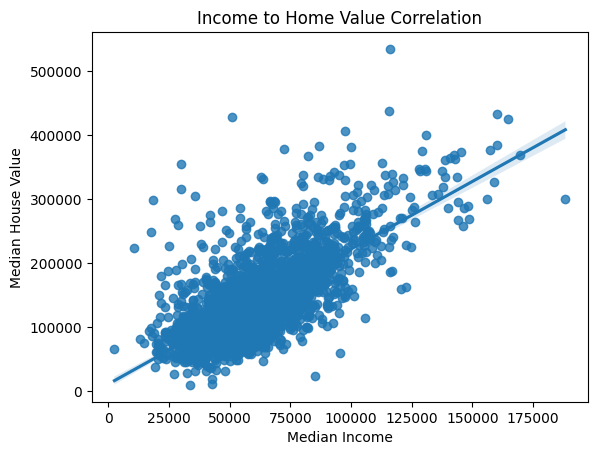

In [12]:
import seaborn as sns
ax= sns.regplot(x="Median Income", y="Median House Value", data=result)
ax.set_title('Income to Home Value Correlation')


R-squared value: 0.48866625402646535


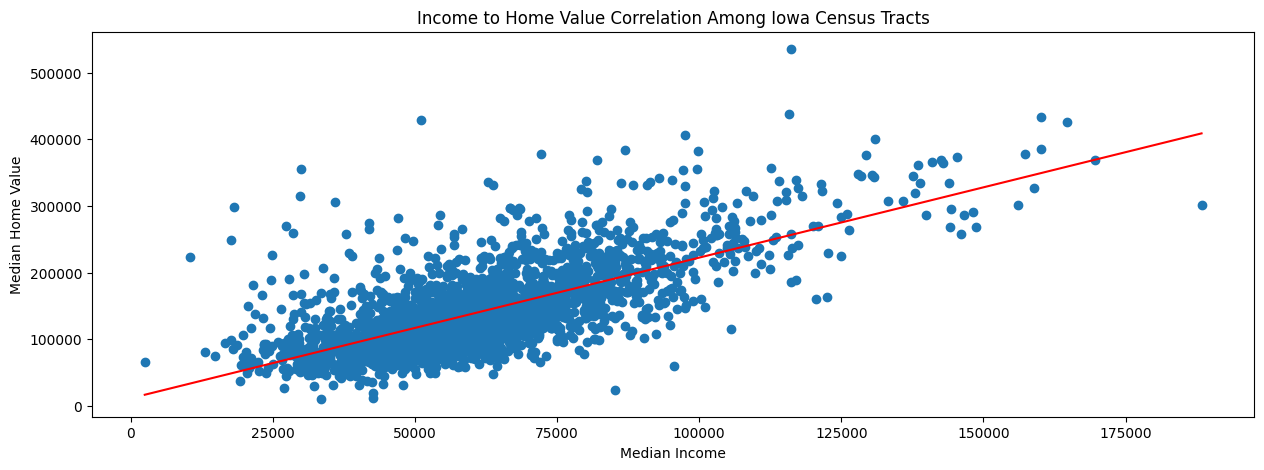

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x=result[["Median Income"]]
y=result["Median House Value"]

model = LinearRegression()
model.fit(x, y)

# Evaluate the model
r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

Y_pred = model.predict(x)
fig = plt.figure(figsize=(15, 5))
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.xlabel('Median Income')
plt.ylabel('Median Home Value')
plt.title('Income to Home Value Correlation Among Iowa Census Tracts')
plt.show()
